Mei-An Blatchford
UID 115943339

# Part 1

In [1]:
#Problem 1
import sqlite3
import pandas
import matplotlib.pyplot as plt
import numpy as np
import random
import statistics

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)
# I perfomed a LEFT [OUTER] JOIN on the data from tables Teams and Salaries to match the 
# total_payroll to the year & team IDs from the table Teams
teams_query = "SELECT teams_win.yearID, teams_win.teamID, W, G, winning_percentage, franchID, total_payroll FROM \
              (SELECT yearID, teamID, W, G, (W*100.0/G) as winning_percentage, franchID FROM Teams) as teams_win \
              LEFT JOIN \
              (SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries GROUP BY teamID, yearID) as \
              teams_salary ON \
              teams_win.teamID = teams_salary.teamID AND teams_win.yearID = teams_salary.yearID"
teams  = pandas.read_sql(teams_query, conn)
print(teams)

      yearID teamID   W    G  winning_percentage franchID  total_payroll
0       1871    BS1  20   31           64.516129      BNA            NaN
1       1871    CH1  19   28           67.857143      CNA            NaN
2       1871    CL1  10   29           34.482759      CFC            NaN
3       1871    FW1   7   19           36.842105      KEK            NaN
4       1871    NY2  16   33           48.484848      NNA            NaN
...      ...    ...  ..  ...                 ...      ...            ...
2770    2014    PIT  88  162           54.320988      PIT     77178000.0
2771    2014    SDN  77  162           47.530864      SDP     75685700.0
2772    2014    SFN  88  162           54.320988      SFG     20000000.0
2773    2014    SLN  90  162           55.555556      STL    120693000.0
2774    2014    WAS  96  162           59.259259      WSN    131983680.0

[2775 rows x 7 columns]


# Part 2

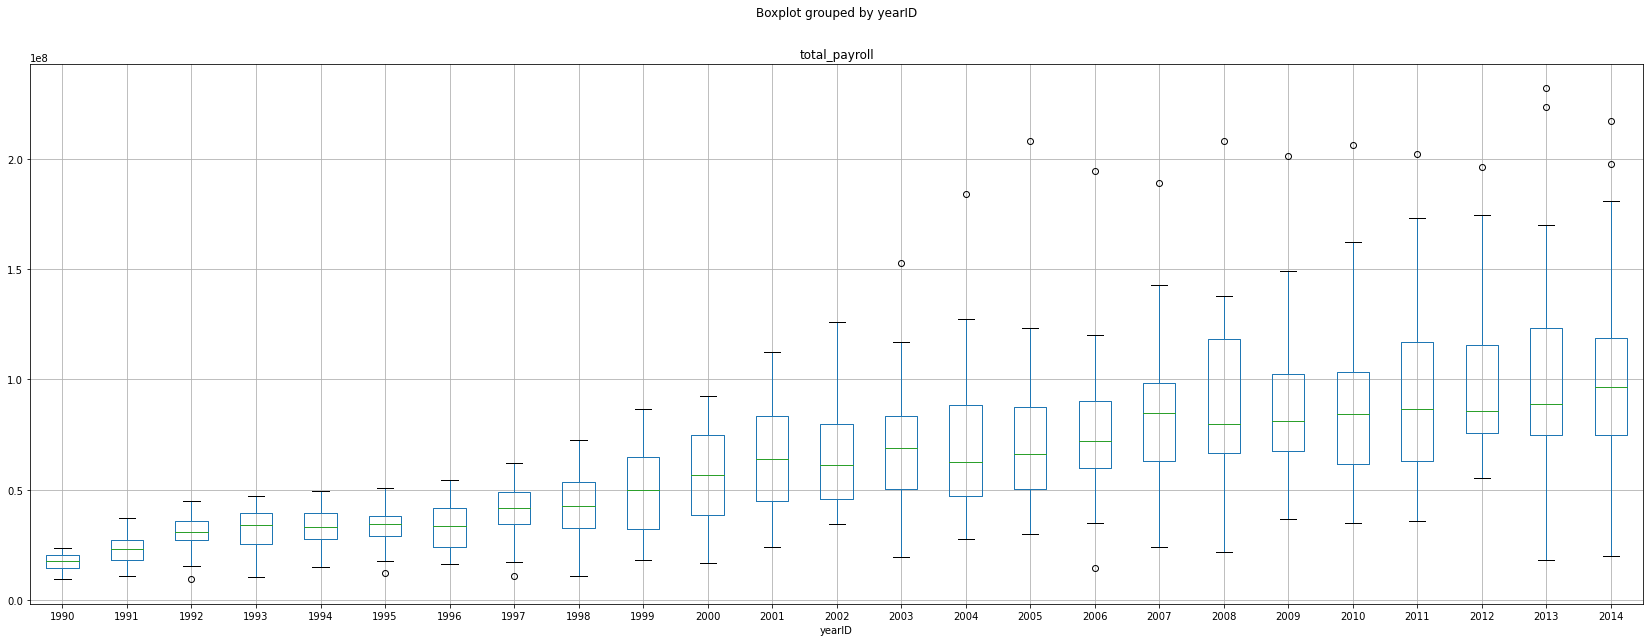

In [2]:
#Problem 2 Creating a box plot of salaries of the year

teams_drop = teams[teams['yearID'].between(1990, 2014)]
#Creates boxplot based on total _payroll for the year
teams_drop = teams_drop.reset_index()
bp = teams_drop.boxplot(column='total_payroll', by='yearID', figsize =(28, 10))

Question 2: The boxplot above shows that as the years go from 1990 to 2014, the total payroll mean increases as well as the range of total payroll. There is a big spike starting in 1999 to 2002, then evens out well still trending upwards. The plots from 2010-2014 have longer whiskers, show greater variance in those years. 

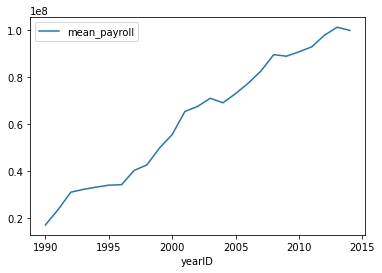

In [3]:
#Problem 3 
#This plot is for the mean total salaries trending upward since 1990. 

mean_data = teams_drop
mean_data = mean_data.groupby(['yearID']).mean()
mean_data = mean_data.rename(columns={ 'total_payroll':'mean_payroll'})
mean_data = mean_data.reset_index()
lp = mean_data.plot.line(x= 'yearID', y='mean_payroll')

Text(0.5, 1.0, 'Avg Payroll vs Avg Winning Percent 2010-2014')

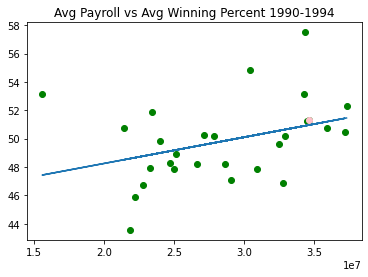

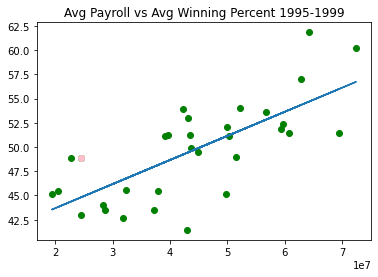

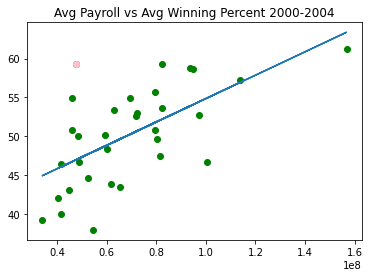

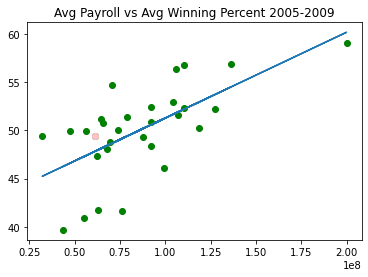

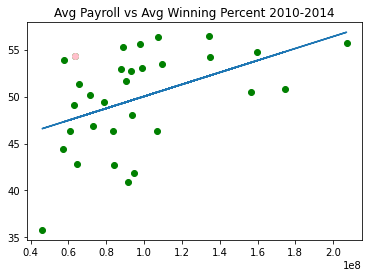

In [4]:
#Problem 4
bin_data = pandas.cut(teams_drop['yearID'], bins=[1990, 1995, 2000, 2005 ,2010, 2015], \
                      include_lowest=True, ordered =True, labels = [1990, 1995, 2000, 2005, 2010])
#labels = [1990, 1995, 2000, 2005, 2010]
binned = teams_drop
binned['bin'] = bin_data #Adding the bin reference to the side 
binned = binned.reset_index()
binned = binned.drop(columns=['level_0', 'index'])

#Data for 1990 - 1994
sp1 = binned[binned['bin'] == 1990]
sp1 = sp1.groupby('teamID').mean()
sp1 = sp1.rename(columns={'winning_percentage':'avg_winning', 'total_payroll':'avg_payroll'})
sp1 = sp1.reset_index()
oak1 = sp1[sp1['teamID'] == 'OAK']
fig, ax1 = plt.subplots()
ax1.scatter(sp1['avg_payroll'] , sp1["avg_winning"], color='green')
ax1.scatter(oak1['avg_payroll'], oak1['avg_winning'], color='pink')
m, b= np.polyfit(x = sp1['avg_payroll'], y = sp1['avg_winning'], deg=1)
ax1.plot(sp1['avg_payroll'], m*sp1['avg_payroll'] + b)
ax1.set_title('Avg Payroll vs Avg Winning Percent 1990-1994')

#Data for 1995 - 1999
sp2 = binned[binned['bin'] == 1995]
sp2 = sp2.groupby('teamID').mean()
sp2 = sp2.rename(columns={'winning_percentage':'avg_winning', 'total_payroll':'avg_payroll'})
sp2 = sp2.reset_index()
oak2 = sp2[sp2['teamID'] == 'OAK']
fig, ax2 = plt.subplots()
ax2.scatter(sp2['avg_payroll'] , sp2["avg_winning"], color='green')
ax2.scatter(oak2['avg_payroll'], oak2['avg_winning'], color='pink')
m, b= np.polyfit(x = sp2['avg_payroll'], y = sp2['avg_winning'], deg=1)
ax2.plot(sp2['avg_payroll'], m*sp2['avg_payroll'] + b)
ax2.set_title('Avg Payroll vs Avg Winning Percent 1995-1999')

#Data for 2000 - 2004
sp3 = binned[binned['bin'] == 2000]
sp3 = sp3.groupby('teamID').mean()
sp3 = sp3.rename(columns={'winning_percentage':'avg_winning', 'total_payroll':'avg_payroll'})
sp3 = sp3.reset_index()
oak3 = sp3[sp3['teamID'] == 'OAK']
fig, ax3 = plt.subplots()
ax3.scatter(sp3['avg_payroll'] , sp3["avg_winning"], color='green')
ax3.scatter(oak3['avg_payroll'], oak3['avg_winning'], color='pink')
m, b= np.polyfit(x = sp3['avg_payroll'], y = sp3['avg_winning'], deg=1)
ax3.plot(sp3['avg_payroll'], m*sp3['avg_payroll'] + b)
ax3.set_title('Avg Payroll vs Avg Winning Percent 2000-2004')

#Data for 2005 - 2009
sp4 = binned[binned['bin'] == 2005]
sp4 = sp4.groupby('teamID').mean()
sp4 = sp4.rename(columns={'winning_percentage':'avg_winning', 'total_payroll':'avg_payroll'})
sp4 = sp4.reset_index()
oak4 = sp4[sp4['teamID'] == 'OAK']
fig, ax4 = plt.subplots()
ax4.scatter(sp4['avg_payroll'] , sp4["avg_winning"], color='green')
ax4.scatter(oak4['avg_payroll'], oak4['avg_winning'], color='pink')
m, b= np.polyfit(x = sp4['avg_payroll'], y = sp4['avg_winning'], deg=1)
ax4.plot(sp4['avg_payroll'], m*sp4['avg_payroll'] + b)
ax4.set_title('Avg Payroll vs Avg Winning Percent 2005-2009')

#Data for 2005 - 2009
sp5 = binned[binned['bin'] == 2010]
sp5 = sp5.groupby('teamID').mean()
sp5 = sp5.rename(columns={'winning_percentage':'avg_winning', 'total_payroll':'avg_payroll'})
sp5 = sp5.reset_index()
oak5 = sp5[sp5['teamID'] == 'OAK']
fig, ax5 = plt.subplots()
ax5.scatter(sp5['avg_payroll'] , sp5["avg_winning"], color='green')
ax5.scatter(oak5['avg_payroll'], oak5['avg_winning'], color='pink')
m, b= np.polyfit(x = sp5['avg_payroll'], y = sp5['avg_winning'], deg=1)
ax5.plot(sp5['avg_payroll'], m*sp5['avg_payroll'] + b)
ax5.set_title('Avg Payroll vs Avg Winning Percent 2010-2014')
#Pink dot is Oakland A's 


Question 2: These plots show an upward trend between increasing average payroll and average winning percent. We can note that the Oakland A's have a relatively low average payroll in comparison to their high winning percentage in 2000-2014. We can also see that in the last 15 years, average payroll has decreased and remained stable for the last 10. 

# Part 3 

In [5]:
#Find average payroll for the year
avg_pay ={}
std_pay={}
stand_pay = []
for year in binned['yearID'].drop_duplicates():
    curr = binned.loc[binned['yearID'] == year]
    avg_pay[year] = statistics.mean(curr['total_payroll'].tolist())
    std_pay[year] = np.std(curr['total_payroll'].tolist())
for index, row in binned.iterrows():
    curr_year = row['yearID']
    curr_pay = row['total_payroll']
    std_p = (curr_pay - avg_pay[curr_year])
    std_p = std_p / std_pay[curr_year]
    stand_pay.append(std_p)
binned['standardized_payroll_by_year'] = stand_pay

Text(0.5, 1.0, 'Avg Standardized Payroll vs Avg Winning Percent 2010-2014')

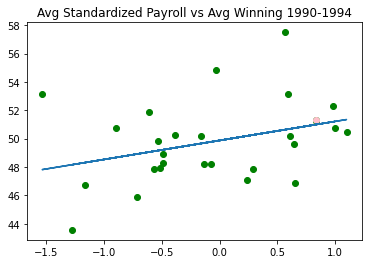

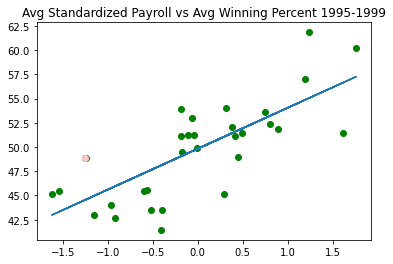

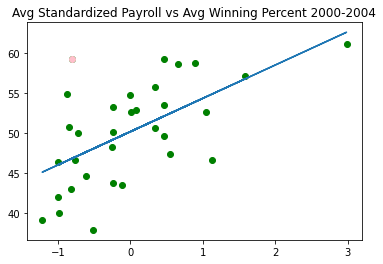

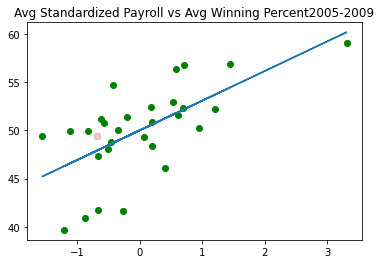

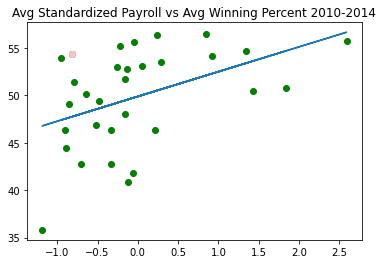

In [6]:
#Problem 6
#Data for 1990 - 1994
sp1p = binned[binned['bin'] == 1990]
sp1p = sp1p.groupby('teamID').mean()
sp1p = sp1p.rename(columns={'winning_percentage':'avg_winning', 'standardized_payroll_by_year':'avg_standard_payroll'})
sp1p = sp1p.reset_index()
#print(sp1p)
oak1p = sp1p[sp1p['teamID'] == 'OAK']
fig, ax1p = plt.subplots()
ax1p.scatter(sp1p['avg_standard_payroll'] , sp1p["avg_winning"], color='green')
ax1p.scatter(oak1p['avg_standard_payroll'], oak1p['avg_winning'], color='pink')
m, b= np.polyfit(x = sp1p['avg_standard_payroll'], y = sp1p['avg_winning'], deg=1)
ax1p.plot(sp1p['avg_standard_payroll'], m*sp1p['avg_standard_payroll'] + b)
ax1p.set_title('Avg Standardized Payroll vs Avg Winning 1990-1994')

#Data for 1995 - 1999
sp2p = binned[binned['bin'] == 1995]
sp2p = sp2p.groupby('teamID').mean()
sp2p = sp2p.rename(columns={'winning_percentage':'avg_winning', 'standardized_payroll_by_year':'avg_standard_payroll'})
sp2p = sp2p.reset_index()
oak2p = sp2p[sp2p['teamID'] == 'OAK']
fig, ax2p = plt.subplots()
ax2p.scatter(sp2p['avg_standard_payroll'] , sp2p["avg_winning"], color='green')
ax2p.scatter(oak2p['avg_standard_payroll'], oak2p['avg_winning'], color='pink')
m, b= np.polyfit(x = sp2p['avg_standard_payroll'], y = sp2p['avg_winning'], deg=1)
ax2p.plot(sp2p['avg_standard_payroll'], m*sp2p['avg_standard_payroll'] + b)
ax2p.set_title('Avg Standardized Payroll vs Avg Winning Percent 1995-1999')

#Data for 2000 - 2004
sp3p = binned[binned['bin'] == 2000]
sp3p = sp3p.groupby('teamID').mean()
sp3p = sp3p.rename(columns={'winning_percentage':'avg_winning', 'standardized_payroll_by_year':'avg_standard_payroll'})
sp3p = sp3p.reset_index()
oak3p = sp3p[sp3p['teamID'] == 'OAK']
fig, ax3p = plt.subplots()
ax3p.scatter(sp3p['avg_standard_payroll'] , sp3p["avg_winning"], color='green')
ax3p.scatter(oak3p['avg_standard_payroll'], oak3p['avg_winning'], color='pink')
m, b= np.polyfit(x = sp3p['avg_standard_payroll'], y = sp3p['avg_winning'], deg=1)
ax3p.plot(sp3p['avg_standard_payroll'], m*sp3p['avg_standard_payroll'] + b)
ax3p.set_title('Avg Standardized Payroll vs Avg Winning Percent 2000-2004')

#Data for 2005 - 2009
sp4p = binned[binned['bin'] == 2005]
sp4p = sp4p.groupby('teamID').mean()
sp4p = sp4p.rename(columns={'winning_percentage':'avg_winning', 'standardized_payroll_by_year':'avg_standard_payroll'})
sp4p = sp4p.reset_index()
oak4p = sp4p[sp4p['teamID'] == 'OAK']
fig, ax4p = plt.subplots()
ax4p.scatter(sp4p['avg_standard_payroll'] , sp4p["avg_winning"], color='green')
ax4p.scatter(oak4p['avg_standard_payroll'], oak4p['avg_winning'], color='pink')
m, b= np.polyfit(x = sp4p['avg_standard_payroll'], y = sp4p['avg_winning'], deg=1)
ax4p.plot(sp4p['avg_standard_payroll'], m*sp4p['avg_standard_payroll'] + b)
ax4p.set_title('Avg Standardized Payroll vs Avg Winning Percent2005-2009')

#Data for 2005 - 2009
sp5p = binned[binned['bin'] == 2010]
sp5p = sp5p.groupby('teamID').mean()
sp5p = sp5p.rename(columns={'winning_percentage':'avg_winning', 'standardized_payroll_by_year':'avg_standard_payroll'})
sp5p = sp5p.reset_index()
oak5p = sp5p[sp5p['teamID'] == 'OAK']
fig, ax5p = plt.subplots()
ax5p.scatter(sp5p['avg_standard_payroll'] , sp5p["avg_winning"], color='green')
ax5p.scatter(oak5p['avg_standard_payroll'], oak5p['avg_winning'], color='pink')
m, b= np.polyfit(x = sp5p['avg_standard_payroll'], y = sp5p['avg_winning'], deg=1)
ax5p.plot(sp5p['avg_standard_payroll'], m*sp5p['avg_standard_payroll'] + b)
ax5p.set_title('Avg Standardized Payroll vs Avg Winning Percent 2010-2014')
#Pink dot is Oakland A's 


Question 3: The Avg Standardized Payroll vs Avg Winning Percent graphs do not look that different from the graphs from Problem 4, so the standardized payroll is proportional to the non-standardized payroll. We can see slight variations, however nothing major. Oakland A's continue to have a high winning percentage with a relatively low average standarized payroll. The margins for standardized payroll remain the relatively the same throughout the time instead of flunctating like the other plots from non-standardized payroll.

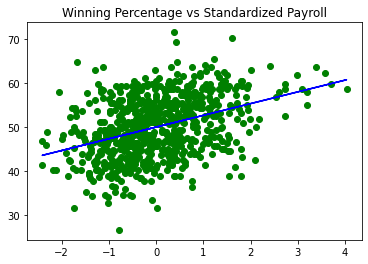

In [11]:
#Problem 7 Expected Wins
fig, ax6 = plt.subplots()
ax6.scatter(binned['standardized_payroll_by_year'], binned['winning_percentage'], color='green')
m, b= np.polyfit(x = binned['standardized_payroll_by_year'], y = binned['winning_percentage'], deg=1)
ax6.plot(binned['standardized_payroll_by_year'], m*binned['standardized_payroll_by_year'] + b, color='blue')
ax6.set_title("Winning Percentage vs Standardized Payroll")

Text(0.5, 1.0, 'Efficiency of noted teams over the years')

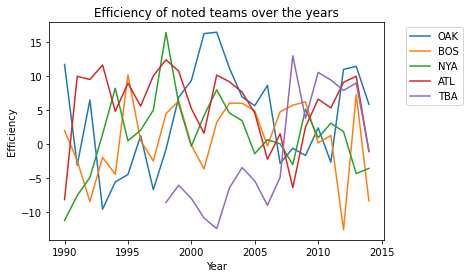

In [24]:
#Problem 8 Adding efficiency & expected values
expect_win = []
for index, row in binned.iterrows():
    expect_win.append(50 + (2.5*row['standardized_payroll_by_year']))
binned['expected_win'] = expect_win

efficiency = []
for index, row in binned.iterrows():
    efficiency.append(row['winning_percentage'] - row['expected_win'])
binned['efficiency'] = efficiency
effic_teams = ['OAK', 'BOS', 'NYA', 'ATL', 'TBA']
for team in effic_teams:
    curr = binned.loc[binned['teamID'] == team]
    x_axis = curr['yearID']
    y_axis = curr['efficiency'].tolist()
    plt.plot(x_axis, y_axis, label=team)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Year")
plt.ylabel("Efficiency")
plt.title("Efficiency of noted teams over the years")

Question 4: This graph shows the efficiency of a team based on the difference between winning percentage expected winning percentage based on the standardized payroll. The Oakland A's did very well in 2000-2004, which is when the Moneyball Era occured. Notably in 2002, their strategy worked and they were competitive and better than teams like the Red Sox and the New York Yankees. Unlike the Oakland A's, Tampa Bay did poorly in the Moneyball era. However after 2002, the Oakland A's dropped significantly. 